In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import os
for dirname, _, filenames in os.walk('/content/drive/MyDrive/fake news'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/content/drive/MyDrive/fake news/true.csv
/content/drive/MyDrive/fake news/fake.csv
/content/drive/MyDrive/fake news/true.gsheet
/content/drive/MyDrive/fake news/fake.gsheet


In [ ]:
import os
for dirname, _, filenames in os.walk('/content/drive/MyDrive/fake news'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/content/drive/MyDrive/fake news/true.csv
/content/drive/MyDrive/fake news/fake.csv
/content/drive/MyDrive/fake news/true.gsheet
/content/drive/MyDrive/fake news/fake.gsheet


In [ ]:
#Preparing Data Set
import numpy as np
import pandas as pd

In [ ]:
df_true = pd.read_csv('/content/drive/MyDrive/fake news/true.csv')
df_fake = pd.read_csv('/content/drive/MyDrive/fake news/fake.csv')

In [ ]:
df_fake['Category'] = 'Fake'
df_true['Category'] = 'True'

In [ ]:
df = pd.concat([df_true, df_fake])

In [ ]:
df.size

224490

In [ ]:
df.shape

(44898, 5)

In [ ]:
df.columns

Index(['title', 'text', 'subject', 'date', 'Category'], dtype='object')

In [ ]:
#Cleaning Data
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 44898 entries, 0 to 23480
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   title     44898 non-null  object
 1   text      44898 non-null  object
 2   subject   44898 non-null  object
 3   date      44898 non-null  object
 4   Category  44898 non-null  object
dtypes: object(5)
memory usage: 2.1+ MB


In [ ]:
df.isna().sum()

title       0
text        0
subject     0
date        0
Category    0
dtype: int64

In [ ]:
df['subject'].value_counts()

subject
politicsNews       11272
worldnews          10145
News                9050
politics            6841
left-news           4459
Government News     1570
US_News              783
Middle-east          778
Name: count, dtype: int64

In [ ]:
df["news"] = df["title"] + " " + df["text"]

In [ ]:
df = df.drop(['title','text','date',],axis=1)

In [ ]:
df

,subject,Category,news
0,politicsNews,True,"As U.S. budget fight looms, Republicans flip t..."
1,politicsNews,True,U.S. military to accept transgender recruits o...
2,politicsNews,True,Senior U.S. Republican senator: 'Let Mr. Muell...
3,politicsNews,True,FBI Russia probe helped by Australian diplomat...
4,politicsNews,True,Trump wants Postal Service to charge 'much mor...
...,...,...,...
23476,Middle-east,Fake,McPain: John McCain Furious That Iran Treated ...
23477,Middle-east,Fake,JUSTICE? Yahoo Settles E-mail Privacy Class-ac...
23478,Middle-east,Fake,Sunnistan: US and Allied ‘Safe Zone’ Plan to T...
23479,Middle-east,Fake,How to Blow $700 Million: Al Jazeera America F...


In [ ]:
df['news'] = df['news'].str.lower()

In [ ]:
import string
import re
import nltk
#remove urls
def remove_urls(text):
    url_pattern = re.compile(r'(https?://\S+)|(www\.\S+)|(\S+\.\S+/\S+)')
    return url_pattern.sub(r'', text)

df['urlsRemoved'] = df['news'].apply(remove_urls)

df

,subject,Category,news,urlsRemoved
0,politicsNews,True,"as u.s. budget fight looms, republicans flip t...","as u.s. budget fight looms, republicans flip t..."
1,politicsNews,True,u.s. military to accept transgender recruits o...,u.s. military to accept transgender recruits o...
2,politicsNews,True,senior u.s. republican senator: 'let mr. muell...,senior u.s. republican senator: 'let mr. muell...
3,politicsNews,True,fbi russia probe helped by australian diplomat...,fbi russia probe helped by australian diplomat...
4,politicsNews,True,trump wants postal service to charge 'much mor...,trump wants postal service to charge 'much mor...
...,...,...,...,...
23476,Middle-east,Fake,mcpain: john mccain furious that iran treated ...,mcpain: john mccain furious that iran treated ...
23477,Middle-east,Fake,justice? yahoo settles e-mail privacy class-ac...,justice? yahoo settles e-mail privacy class-ac...
23478,Middle-east,Fake,sunnistan: us and allied ‘safe zone’ plan to t...,sunnistan: us and allied ‘safe zone’ plan to t...
23479,Middle-east,Fake,how to blow $700 million: al jazeera america f...,how to blow $700 million: al jazeera america f...


In [ ]:
#Removing Emoji and Emoticons
def remove_emoji(text):
    emoji_pattern = re.compile("["
                                  u"\U0001F600-\U0001F64F"  # emoticons
                                  u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                                  u"\U0001F680-\U0001F6FF"  # transport & map symbols
                                  u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                                  u"\U00002702-\U000027B0"  # other miscellaneous symbols
                                  u"\U000024C2-\U0001F251"  # enclosed characters
                                "]+", flags=re.UNICODE)

    return emoji_pattern.sub(r'', text)

df['emojiRemoved'] = df['urlsRemoved'].apply(remove_emoji)

df

,subject,Category,news,urlsRemoved,emojiRemoved
0,politicsNews,True,"as u.s. budget fight looms, republicans flip t...","as u.s. budget fight looms, republicans flip t...","as u.s. budget fight looms, republicans flip t..."
1,politicsNews,True,u.s. military to accept transgender recruits o...,u.s. military to accept transgender recruits o...,u.s. military to accept transgender recruits o...
2,politicsNews,True,senior u.s. republican senator: 'let mr. muell...,senior u.s. republican senator: 'let mr. muell...,senior u.s. republican senator: 'let mr. muell...
3,politicsNews,True,fbi russia probe helped by australian diplomat...,fbi russia probe helped by australian diplomat...,fbi russia probe helped by australian diplomat...
4,politicsNews,True,trump wants postal service to charge 'much mor...,trump wants postal service to charge 'much mor...,trump wants postal service to charge 'much mor...
...,...,...,...,...,...
23476,Middle-east,Fake,mcpain: john mccain furious that iran treated ...,mcpain: john mccain furious that iran treated ...,mcpain: john mccain furious that iran treated ...
23477,Middle-east,Fake,justice? yahoo settles e-mail privacy class-ac...,justice? yahoo settles e-mail privacy class-ac...,justice? yahoo settles e-mail privacy class-ac...
23478,Middle-east,Fake,sunnistan: us and allied ‘safe zone’ plan to t...,sunnistan: us and allied ‘safe zone’ plan to t...,sunnistan: us and allied ‘safe zone’ plan to t...
23479,Middle-east,Fake,how to blow $700 million: al jazeera america f...,how to blow $700 million: al jazeera america f...,how to blow $700 million: al jazeera america f...


In [ ]:
#Removing Punctuations

# match all non-alphanumeric and non-whitespace characters,
pattern = r"[^\w\s]"


df['punkt'] = df['emojiRemoved'].apply(lambda x: re.sub(pattern, " ", x))

df

,subject,Category,news,urlsRemoved,emojiRemoved,punkt
0,politicsNews,True,"as u.s. budget fight looms, republicans flip t...","as u.s. budget fight looms, republicans flip t...","as u.s. budget fight looms, republicans flip t...",as u s budget fight looms republicans flip t...
1,politicsNews,True,u.s. military to accept transgender recruits o...,u.s. military to accept transgender recruits o...,u.s. military to accept transgender recruits o...,u s military to accept transgender recruits o...
2,politicsNews,True,senior u.s. republican senator: 'let mr. muell...,senior u.s. republican senator: 'let mr. muell...,senior u.s. republican senator: 'let mr. muell...,senior u s republican senator let mr muell...
3,politicsNews,True,fbi russia probe helped by australian diplomat...,fbi russia probe helped by australian diplomat...,fbi russia probe helped by australian diplomat...,fbi russia probe helped by australian diplomat...
4,politicsNews,True,trump wants postal service to charge 'much mor...,trump wants postal service to charge 'much mor...,trump wants postal service to charge 'much mor...,trump wants postal service to charge much mor...
...,...,...,...,...,...,...
23476,Middle-east,Fake,mcpain: john mccain furious that iran treated ...,mcpain: john mccain furious that iran treated ...,mcpain: john mccain furious that iran treated ...,mcpain john mccain furious that iran treated ...
23477,Middle-east,Fake,justice? yahoo settles e-mail privacy class-ac...,justice? yahoo settles e-mail privacy class-ac...,justice? yahoo settles e-mail privacy class-ac...,justice yahoo settles e mail privacy class ac...
23478,Middle-east,Fake,sunnistan: us and allied ‘safe zone’ plan to t...,sunnistan: us and allied ‘safe zone’ plan to t...,sunnistan: us and allied ‘safe zone’ plan to t...,sunnistan us and allied safe zone plan to t...
23479,Middle-east,Fake,how to blow $700 million: al jazeera america f...,how to blow $700 million: al jazeera america f...,how to blow $700 million: al jazeera america f...,how to blow 700 million al jazeera america f...


In [ ]:
#Removing Stop Words
from nltk.corpus import stopwords
nltk.download('stopwords')
nltk.download('punkt')
STOPWORDS = set(stopwords.words('english'))

# Function to remove the stopwords
def stopwords(text):
    return " ".join([word for word in text.split() if word not in STOPWORDS])

df['stopWord_Removed'] = df['punkt'].apply(stopwords)

df

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


,subject,Category,news,urlsRemoved,emojiRemoved,punkt,stopWord_Removed
0,politicsNews,True,"as u.s. budget fight looms, republicans flip t...","as u.s. budget fight looms, republicans flip t...","as u.s. budget fight looms, republicans flip t...",as u s budget fight looms republicans flip t...,u budget fight looms republicans flip fiscal s...
1,politicsNews,True,u.s. military to accept transgender recruits o...,u.s. military to accept transgender recruits o...,u.s. military to accept transgender recruits o...,u s military to accept transgender recruits o...,u military accept transgender recruits monday ...
2,politicsNews,True,senior u.s. republican senator: 'let mr. muell...,senior u.s. republican senator: 'let mr. muell...,senior u.s. republican senator: 'let mr. muell...,senior u s republican senator let mr muell...,senior u republican senator let mr mueller job...
3,politicsNews,True,fbi russia probe helped by australian diplomat...,fbi russia probe helped by australian diplomat...,fbi russia probe helped by australian diplomat...,fbi russia probe helped by australian diplomat...,fbi russia probe helped australian diplomat ti...
4,politicsNews,True,trump wants postal service to charge 'much mor...,trump wants postal service to charge 'much mor...,trump wants postal service to charge 'much mor...,trump wants postal service to charge much mor...,trump wants postal service charge much amazon ...
...,...,...,...,...,...,...,...
23476,Middle-east,Fake,mcpain: john mccain furious that iran treated ...,mcpain: john mccain furious that iran treated ...,mcpain: john mccain furious that iran treated ...,mcpain john mccain furious that iran treated ...,mcpain john mccain furious iran treated us sai...
23477,Middle-east,Fake,justice? yahoo settles e-mail privacy class-ac...,justice? yahoo settles e-mail privacy class-ac...,justice? yahoo settles e-mail privacy class-ac...,justice yahoo settles e mail privacy class ac...,justice yahoo settles e mail privacy class act...
23478,Middle-east,Fake,sunnistan: us and allied ‘safe zone’ plan to t...,sunnistan: us and allied ‘safe zone’ plan to t...,sunnistan: us and allied ‘safe zone’ plan to t...,sunnistan us and allied safe zone plan to t...,sunnistan us allied safe zone plan take territ...
23479,Middle-east,Fake,how to blow $700 million: al jazeera america f...,how to blow $700 million: al jazeera america f...,how to blow $700 million: al jazeera america f...,how to blow 700 million al jazeera america f...,blow 700 million al jazeera america finally ca...


In [ ]:
#Lemmatization
from nltk.corpus import stopwords
nltk.download('wordnet', '/root/nltk_data/')
#!unzip /root/nltk_data/corpora/wordnet.zip -d /root/nltk_data/corpora/
from nltk.stem.wordnet import WordNetLemmatizer
lemmatizer = nltk.stem.wordnet.WordNetLemmatizer()

def lemmatizeRows(text):
    return " ".join([lemmatizer.lemmatize(word) for word in text.split()])

df['lemmatizedRows'] = df['stopWord_Removed'].apply(lemmatizeRows)

df

[nltk_data] Downloading package wordnet to /root/nltk_data/...


,subject,Category,news,urlsRemoved,emojiRemoved,punkt,stopWord_Removed,lemmatizedRows
0,politicsNews,True,"as u.s. budget fight looms, republicans flip t...","as u.s. budget fight looms, republicans flip t...","as u.s. budget fight looms, republicans flip t...",as u s budget fight looms republicans flip t...,u budget fight looms republicans flip fiscal s...,u budget fight loom republican flip fiscal scr...
1,politicsNews,True,u.s. military to accept transgender recruits o...,u.s. military to accept transgender recruits o...,u.s. military to accept transgender recruits o...,u s military to accept transgender recruits o...,u military accept transgender recruits monday ...,u military accept transgender recruit monday p...
2,politicsNews,True,senior u.s. republican senator: 'let mr. muell...,senior u.s. republican senator: 'let mr. muell...,senior u.s. republican senator: 'let mr. muell...,senior u s republican senator let mr muell...,senior u republican senator let mr mueller job...,senior u republican senator let mr mueller job...
3,politicsNews,True,fbi russia probe helped by australian diplomat...,fbi russia probe helped by australian diplomat...,fbi russia probe helped by australian diplomat...,fbi russia probe helped by australian diplomat...,fbi russia probe helped australian diplomat ti...,fbi russia probe helped australian diplomat ti...
4,politicsNews,True,trump wants postal service to charge 'much mor...,trump wants postal service to charge 'much mor...,trump wants postal service to charge 'much mor...,trump wants postal service to charge much mor...,trump wants postal service charge much amazon ...,trump want postal service charge much amazon s...
...,...,...,...,...,...,...,...,...
23476,Middle-east,Fake,mcpain: john mccain furious that iran treated ...,mcpain: john mccain furious that iran treated ...,mcpain: john mccain furious that iran treated ...,mcpain john mccain furious that iran treated ...,mcpain john mccain furious iran treated us sai...,mcpain john mccain furious iran treated u sail...
23477,Middle-east,Fake,justice? yahoo settles e-mail privacy class-ac...,justice? yahoo settles e-mail privacy class-ac...,justice? yahoo settles e-mail privacy class-ac...,justice yahoo settles e mail privacy class ac...,justice yahoo settles e mail privacy class act...,justice yahoo settle e mail privacy class acti...
23478,Middle-east,Fake,sunnistan: us and allied ‘safe zone’ plan to t...,sunnistan: us and allied ‘safe zone’ plan to t...,sunnistan: us and allied ‘safe zone’ plan to t...,sunnistan us and allied safe zone plan to t...,sunnistan us allied safe zone plan take territ...,sunnistan u allied safe zone plan take territo...
23479,Middle-east,Fake,how to blow $700 million: al jazeera america f...,how to blow $700 million: al jazeera america f...,how to blow $700 million: al jazeera america f...,how to blow 700 million al jazeera america f...,blow 700 million al jazeera america finally ca...,blow 700 million al jazeera america finally ca...


In [ ]:
# token cleaning
def cleanData(text):

    ReapeatTokensRm =  " ".join( [ re.sub(r'(\w)\1{2,}', r'\1', word) for word in text.split()] )  # Remove repeating characters from tokens

    digitTokensRm =  " ".join( [ word for word in ReapeatTokensRm.split() if not re.search(r'\d', word) ] ) # Remove tokens containing digits

    underscoreTokensRm =  " ".join( [ word for word in digitTokensRm.split() if not re.search(r'_|\w*_\w*', word) ] ) # Remove tokens containing underscore

    specialTokensRm =  " ".join( [ word for word in underscoreTokensRm.split() if not re.search(r'[^a-zA-Z0-9\s]', word) ] ) # Remove tokens containing Special Characters

    return " ".join( [ word for word in specialTokensRm.split() if len(word) > 2 ] )  # Remove tokens less than 2 characters


df['cleanTokens'] = df['lemmatizedRows'].apply(cleanData)

df

,subject,Category,news,urlsRemoved,emojiRemoved,punkt,stopWord_Removed,lemmatizedRows,cleanTokens
0,politicsNews,True,"as u.s. budget fight looms, republicans flip t...","as u.s. budget fight looms, republicans flip t...","as u.s. budget fight looms, republicans flip t...",as u s budget fight looms republicans flip t...,u budget fight looms republicans flip fiscal s...,u budget fight loom republican flip fiscal scr...,budget fight loom republican flip fiscal scrip...
1,politicsNews,True,u.s. military to accept transgender recruits o...,u.s. military to accept transgender recruits o...,u.s. military to accept transgender recruits o...,u s military to accept transgender recruits o...,u military accept transgender recruits monday ...,u military accept transgender recruit monday p...,military accept transgender recruit monday pen...
2,politicsNews,True,senior u.s. republican senator: 'let mr. muell...,senior u.s. republican senator: 'let mr. muell...,senior u.s. republican senator: 'let mr. muell...,senior u s republican senator let mr muell...,senior u republican senator let mr mueller job...,senior u republican senator let mr mueller job...,senior republican senator let mueller job wash...
3,politicsNews,True,fbi russia probe helped by australian diplomat...,fbi russia probe helped by australian diplomat...,fbi russia probe helped by australian diplomat...,fbi russia probe helped by australian diplomat...,fbi russia probe helped australian diplomat ti...,fbi russia probe helped australian diplomat ti...,fbi russia probe helped australian diplomat ti...
4,politicsNews,True,trump wants postal service to charge 'much mor...,trump wants postal service to charge 'much mor...,trump wants postal service to charge 'much mor...,trump wants postal service to charge much mor...,trump wants postal service charge much amazon ...,trump want postal service charge much amazon s...,trump want postal service charge much amazon s...
...,...,...,...,...,...,...,...,...,...
23476,Middle-east,Fake,mcpain: john mccain furious that iran treated ...,mcpain: john mccain furious that iran treated ...,mcpain: john mccain furious that iran treated ...,mcpain john mccain furious that iran treated ...,mcpain john mccain furious iran treated us sai...,mcpain john mccain furious iran treated u sail...,mcpain john mccain furious iran treated sailor...
23477,Middle-east,Fake,justice? yahoo settles e-mail privacy class-ac...,justice? yahoo settles e-mail privacy class-ac...,justice? yahoo settles e-mail privacy class-ac...,justice yahoo settles e mail privacy class ac...,justice yahoo settles e mail privacy class act...,justice yahoo settle e mail privacy class acti...,justice yahoo settle mail privacy class action...
23478,Middle-east,Fake,sunnistan: us and allied ‘safe zone’ plan to t...,sunnistan: us and allied ‘safe zone’ plan to t...,sunnistan: us and allied ‘safe zone’ plan to t...,sunnistan us and allied safe zone plan to t...,sunnistan us allied safe zone plan take territ...,sunnistan u allied safe zone plan take territo...,sunnistan allied safe zone plan take territori...
23479,Middle-east,Fake,how to blow $700 million: al jazeera america f...,how to blow $700 million: al jazeera america f...,how to blow $700 million: al jazeera america f...,how to blow 700 million al jazeera america f...,blow 700 million al jazeera america finally ca...,blow 700 million al jazeera america finally ca...,blow million jazeera america finally call quit...


In [ ]:
# Handling Columns and Tokenizing Data
df2 = df

In [ ]:
df2 = df2.drop(['news','urlsRemoved','emojiRemoved','punkt','stopWord_Removed','lemmatizedRows'],axis=1)

In [ ]:
df2

,subject,Category,cleanTokens
0,politicsNews,True,budget fight loom republican flip fiscal scrip...
1,politicsNews,True,military accept transgender recruit monday pen...
2,politicsNews,True,senior republican senator let mueller job wash...
3,politicsNews,True,fbi russia probe helped australian diplomat ti...
4,politicsNews,True,trump want postal service charge much amazon s...
...,...,...,...
23476,Middle-east,Fake,mcpain john mccain furious iran treated sailor...
23477,Middle-east,Fake,justice yahoo settle mail privacy class action...
23478,Middle-east,Fake,sunnistan allied safe zone plan take territori...
23479,Middle-east,Fake,blow million jazeera america finally call quit...


In [ ]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [ ]:
df2['Category']= le.fit_transform(df2['Category'])

In [ ]:
df2['subject']= le.fit_transform(df2['subject'])

In [ ]:
df2

,subject,Category,cleanTokens
0,6,1,budget fight loom republican flip fiscal scrip...
1,6,1,military accept transgender recruit monday pen...
2,6,1,senior republican senator let mueller job wash...
3,6,1,fbi russia probe helped australian diplomat ti...
4,6,1,trump want postal service charge much amazon s...
...,...,...,...
23476,1,0,mcpain john mccain furious iran treated sailor...
23477,1,0,justice yahoo settle mail privacy class action...
23478,1,0,sunnistan allied safe zone plan take territori...
23479,1,0,blow million jazeera america finally call quit...


In [ ]:
df2.shape

(44898, 3)

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

Vectorizer = TfidfVectorizer(max_features=100)
X = Vectorizer.fit_transform(df2['cleanTokens']).toarray()
feature_names = Vectorizer.get_feature_names_out()

In [ ]:
y = df2[['subject', 'Category']]

In [ ]:
y

,subject,Category
0,6,1
1,6,1
2,6,1
3,6,1
4,6,1
...,...,...
23476,1,0
23477,1,0
23478,1,0
23479,1,0


In [ ]:
feature_names[:5000]

array(['according', 'administration', 'also', 'america', 'american',
       'attack', 'back', 'bill', 'called', 'campaign', 'candidate',
       'city', 'clinton', 'could', 'country', 'court', 'day', 'democrat',
       'democratic', 'department', 'donald', 'election', 'even', 'first',
       'former', 'get', 'going', 'government', 'group', 'hillary',
       'house', 'image', 'including', 'know', 'last', 'law', 'leader',
       'like', 'made', 'make', 'many', 'may', 'medium', 'member',
       'military', 'million', 'month', 'national', 'need', 'new', 'news',
       'north', 'obama', 'office', 'official', 'one', 'party', 'people',
       'percent', 'police', 'policy', 'political', 'president',
       'presidential', 'public', 'report', 'republican', 'reuters',
       'right', 'russia', 'russian', 'said', 'say', 'security', 'senate',
       'since', 'state', 'statement', 'support', 'take', 'tax', 'think',
       'time', 'told', 'trump', 'two', 'united', 'via', 'video', 'vote',
       'want

In [ ]:
X

array([[0.        , 0.09565145, 0.09757633, ..., 0.        , 0.0869719 ,
        0.09480726],
       [0.        , 0.50607174, 0.        , ..., 0.        , 0.18406004,
        0.        ],
       [0.        , 0.1142183 , 0.        , ..., 0.        , 0.03461799,
        0.03773675],
       ...,
       [0.04577239, 0.0497002 , 0.1690012 , ..., 0.09907554, 0.21088822,
        0.11494364],
       [0.        , 0.        , 0.        , ..., 0.        , 0.11203153,
        0.06106226],
       [0.35310439, 0.        , 0.0521494 , ..., 0.        , 0.09296378,
        0.05066947]])

In [ ]:
X=pd.DataFrame(X, columns = feature_names)

In [ ]:
X.shape
#y.shape

(44898, 100)

In [ ]:
X

,according,administration,also,america,american,attack,back,bill,called,campaign,...,want,washington,way,week,well,white,woman,world,would,year
0,0.000000,0.095651,0.097576,0.000000,0.000000,0.000000,0.042699,0.158178,0.043489,0.042602,...,0.169787,0.079631,0.042371,0.000000,0.044512,0.041789,0.000000,0.000000,0.086972,0.094807
1,0.000000,0.506072,0.000000,0.000000,0.041233,0.000000,0.045182,0.000000,0.046018,0.000000,...,0.000000,0.126393,0.044836,0.085444,0.000000,0.000000,0.000000,0.000000,0.184060,0.000000
2,0.000000,0.114218,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.305229,...,0.152058,0.095088,0.101192,0.096422,0.053152,0.049900,0.000000,0.000000,0.034618,0.037737
3,0.072634,0.000000,0.053636,0.000000,0.064257,0.000000,0.000000,0.000000,0.000000,0.351263,...,0.000000,0.065657,0.000000,0.000000,0.000000,0.206733,0.000000,0.000000,0.047807,0.052114
4,0.267301,0.000000,0.078954,0.000000,0.047295,0.000000,0.000000,0.000000,0.052784,0.000000,...,0.051519,0.144976,0.000000,0.000000,0.000000,0.050720,0.000000,0.057858,0.035187,0.230142
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44893,0.203812,0.221301,0.000000,0.000000,0.090153,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.092118,0.098031,0.093410,0.514921,0.000000,0.000000,0.220578,0.201220,0.000000
44894,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.221309,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
44895,0.045772,0.049700,0.169001,0.048366,0.020247,0.130531,0.110930,0.000000,0.045193,0.000000,...,0.110276,0.393072,0.110080,0.104891,0.069385,0.000000,0.080669,0.099076,0.210888,0.114944
44896,0.000000,0.000000,0.000000,0.449644,0.075291,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.081870,0.000000,0.000000,0.000000,0.000000,0.000000,0.112032,0.061062


In [ ]:
X.shape

(44898, 100)

In [ ]:
X= X.reset_index()

y= y.reset_index()

In [ ]:
X_new = pd.concat([X,y],axis=1)

In [ ]:
X_new

,index,according,administration,also,america,american,attack,back,bill,called,...,week,well,white,woman,world,would,year,index,subject,Category
0,0,0.000000,0.095651,0.097576,0.000000,0.000000,0.000000,0.042699,0.158178,0.043489,...,0.000000,0.044512,0.041789,0.000000,0.000000,0.086972,0.094807,0,6,1
1,1,0.000000,0.506072,0.000000,0.000000,0.041233,0.000000,0.045182,0.000000,0.046018,...,0.085444,0.000000,0.000000,0.000000,0.000000,0.184060,0.000000,1,6,1
2,2,0.000000,0.114218,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.096422,0.053152,0.049900,0.000000,0.000000,0.034618,0.037737,2,6,1
3,3,0.072634,0.000000,0.053636,0.000000,0.064257,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.206733,0.000000,0.000000,0.047807,0.052114,3,6,1
4,4,0.267301,0.000000,0.078954,0.000000,0.047295,0.000000,0.000000,0.000000,0.052784,...,0.000000,0.000000,0.050720,0.000000,0.057858,0.035187,0.230142,4,6,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44893,44893,0.203812,0.221301,0.000000,0.000000,0.090153,0.000000,0.000000,0.000000,0.000000,...,0.093410,0.514921,0.000000,0.000000,0.220578,0.201220,0.000000,23476,1,0
44894,44894,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.221309,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,23477,1,0
44895,44895,0.045772,0.049700,0.169001,0.048366,0.020247,0.130531,0.110930,0.000000,0.045193,...,0.104891,0.069385,0.000000,0.080669,0.099076,0.210888,0.114944,23478,1,0
44896,44896,0.000000,0.000000,0.000000,0.449644,0.075291,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.112032,0.061062,23479,1,0


In [ ]:
y=X_new['Category']

In [ ]:
y

0        1
1        1
2        1
3        1
4        1
        ..
44893    0
44894    0
44895    0
44896    0
44897    0
Name: Category, Length: 44898, dtype: int64

In [ ]:
X=X_new

In [ ]:
X=X.drop(['index','Category','index'],axis=1)

In [ ]:
X

,according,administration,also,america,american,attack,back,bill,called,campaign,...,washington,way,week,well,white,woman,world,would,year,subject
0,0.000000,0.095651,0.097576,0.000000,0.000000,0.000000,0.042699,0.158178,0.043489,0.042602,...,0.079631,0.042371,0.000000,0.044512,0.041789,0.000000,0.000000,0.086972,0.094807,6
1,0.000000,0.506072,0.000000,0.000000,0.041233,0.000000,0.045182,0.000000,0.046018,0.000000,...,0.126393,0.044836,0.085444,0.000000,0.000000,0.000000,0.000000,0.184060,0.000000,6
2,0.000000,0.114218,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.305229,...,0.095088,0.101192,0.096422,0.053152,0.049900,0.000000,0.000000,0.034618,0.037737,6
3,0.072634,0.000000,0.053636,0.000000,0.064257,0.000000,0.000000,0.000000,0.000000,0.351263,...,0.065657,0.000000,0.000000,0.000000,0.206733,0.000000,0.000000,0.047807,0.052114,6
4,0.267301,0.000000,0.078954,0.000000,0.047295,0.000000,0.000000,0.000000,0.052784,0.000000,...,0.144976,0.000000,0.000000,0.000000,0.050720,0.000000,0.057858,0.035187,0.230142,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44893,0.203812,0.221301,0.000000,0.000000,0.090153,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.092118,0.098031,0.093410,0.514921,0.000000,0.000000,0.220578,0.201220,0.000000,1
44894,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.221309,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1
44895,0.045772,0.049700,0.169001,0.048366,0.020247,0.130531,0.110930,0.000000,0.045193,0.000000,...,0.393072,0.110080,0.104891,0.069385,0.000000,0.080669,0.099076,0.210888,0.114944,1
44896,0.000000,0.000000,0.000000,0.449644,0.075291,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.081870,0.000000,0.000000,0.000000,0.000000,0.000000,0.112032,0.061062,1


In [ ]:
# Using Machine Learning
from sklearn.model_selection import train_test_split

X_train, X_test ,y_train ,y_test = train_test_split(X,y, test_size=0.5,
                                                    stratify=y , random_state=45)


In [ ]:
X_test

,according,administration,also,america,american,attack,back,bill,called,campaign,...,washington,way,week,well,white,woman,world,would,year,subject
32404,0.254125,0.206949,0.046914,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.114858,0.061116,0.058235,0.064204,0.000000,0.000000,0.068758,0.041816,0.000000,5
5234,0.000000,0.220865,0.000000,0.107469,0.089976,0.000000,0.098594,0.000000,0.000000,0.196742,...,0.183873,0.000000,0.000000,0.000000,0.192985,0.000000,0.000000,0.066941,0.072972,6
27985,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.061571,0.000000,0.000000,0.184297,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.083609,0.091142,2
44764,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.214760,...,0.000000,0.000000,0.101764,0.000000,0.000000,0.000000,0.000000,0.146144,0.000000,1
3079,0.000000,0.141923,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.064527,0.000000,...,0.177228,0.000000,0.000000,0.066045,0.124007,0.000000,0.070729,0.086030,0.093780,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39266,0.018397,0.013317,0.063397,0.291593,0.303806,0.027981,0.011889,0.029363,0.006055,0.088969,...,0.022173,0.029496,0.005621,0.043381,0.011636,0.180127,0.086278,0.004036,0.017599,4
34817,0.000000,0.000000,0.000000,0.000000,0.111208,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.115225,0.254071,0.000000,0.000000,0.000000,0.082738,0.000000,5
42829,0.044803,0.000000,0.000000,0.000000,0.039636,0.000000,0.000000,0.000000,0.000000,0.086667,...,0.000000,0.043099,0.000000,0.000000,0.042506,0.000000,0.000000,0.000000,0.064290,4
15174,0.049464,0.000000,0.036526,0.000000,0.000000,0.000000,0.047951,0.000000,0.000000,0.047842,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.283918,7


In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier

In [ ]:
lr = LogisticRegression()

nb = MultinomialNB()

dt = DecisionTreeClassifier()

In [ ]:
lr.fit(X_train, y_train)

nb.fit(X_train, y_train)

dt.fit(X_train, y_train)

DecisionTreeClassifier()

In [ ]:
import matplotlib.pyplot as plt
colors = plt.cm.viridis(np.linspace(0, 1, 3))

models = ["Logistic Regression","Naive Bayes","Decision Trees"]

In [ ]:
lrScore = lr.score(X_test, y_test)

nbScore = nb.score(X_test, y_test)

dtScore = dt.score(X_test, y_test)

Logistic Regression Accuracy score is : 100.0%

Naive Bayes Accuracy score is : 94.65%

Decision Tree  Accuracy score is : 100.0%


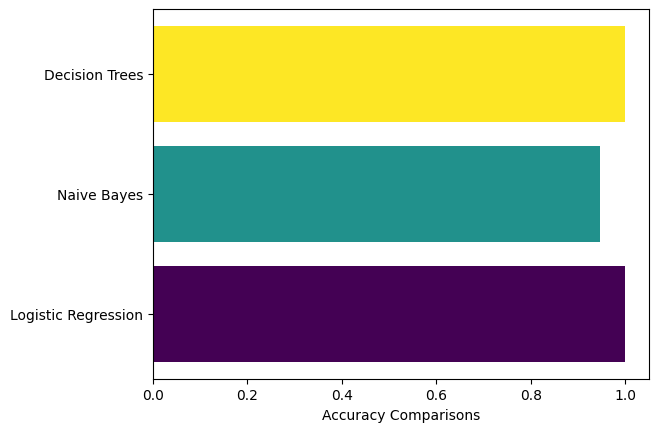

In [ ]:
plt.barh(models, width = [lrScore, nbScore, dtScore],
        color = colors)

plt.xlabel("Accuracy Comparisons")


print(f'Logistic Regression Accuracy score is : {round(lrScore * 100 ,2)}%')

print(f'\nNaive Bayes Accuracy score is : {round(nbScore * 100 , 2)}%')

print(f'\nDecision Tree  Accuracy score is : {round(dtScore * 100 , 2)}%')

In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report, roc_auc_score

In [ ]:
lrPreds = lr.predict(X_test)

nbPreds = nb.predict(X_test)

dtPreds = dt.predict(X_test)

In [ ]:
lrScore = roc_auc_score(lrPreds, y_test)

nbScore = roc_auc_score(nbPreds, y_test)

dtScore = roc_auc_score(dtPreds, y_test)

Logistic Regression Test Roc Auc Score is : 100.0%

Naive Bayes Test Roc Auc Score is : 94.64%

Decision Tree Test Roc Auc Score is : 100.0%


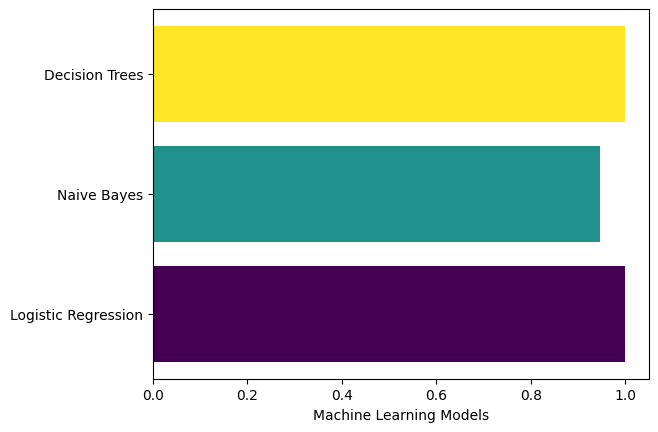

In [ ]:
plt.barh(models, width = [lrScore, nbScore, dtScore],
        color = colors)

plt.xlabel("Machine Learning Models")


print(f'Logistic Regression Test Roc Auc Score is : {round(lrScore * 100 ,2)}%')

print(f'\nNaive Bayes Test Roc Auc Score is : {round(nbScore * 100 , 2)}%')

print(f'\nDecision Tree Test Roc Auc Score is : {round(dtScore * 100 , 2)}%')

In [ ]:
import seaborn as sns
def makeCM_Matrix(cm_matrix, title):

  categories = ['Negative','Positive']

  group_names = ['True Negative','False Positive', 'False Negative','True Positive']

  group_percentages = ['{0:.2%}'.format(value) for value in cm_matrix.flatten() / np.sum(cm_matrix)]

  labels = [f'{v1}\n{v2} ({v3})' for v1, v2 ,v3 in zip(group_names,cm_matrix.flatten(),group_percentages)]

  labels = np.asarray(labels).reshape(2,2)

  sns.heatmap(cm_matrix, annot = labels,fmt = '',
  xticklabels = categories, yticklabels = categories)
  plt.xlabel("Predicted values", fontdict = {'size':14}, labelpad = 10)
  plt.ylabel("Actual values" , fontdict = {'size':14}, labelpad = 10)
  plt.title (f"{title} Confusion Matrix", fontdict = {'size':18}, pad = 20)
  plt.show()

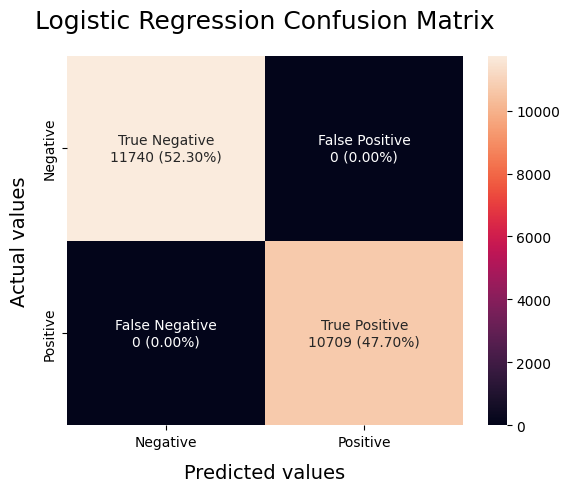

In [ ]:
makeCM_Matrix(confusion_matrix(y_test, lrPreds), 'Logistic Regression')

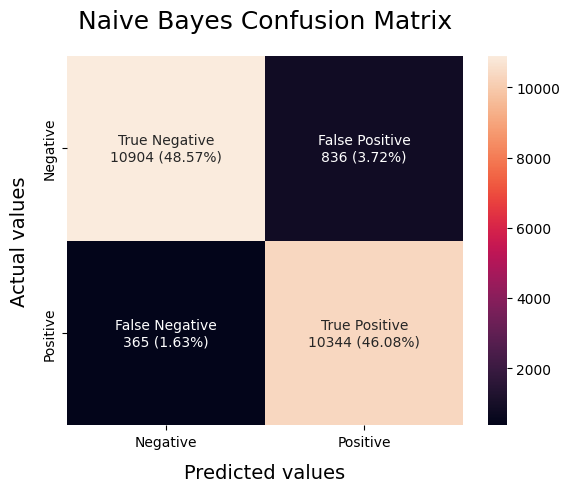

In [ ]:
makeCM_Matrix(confusion_matrix(y_test, nbPreds), 'Naive Bayes')

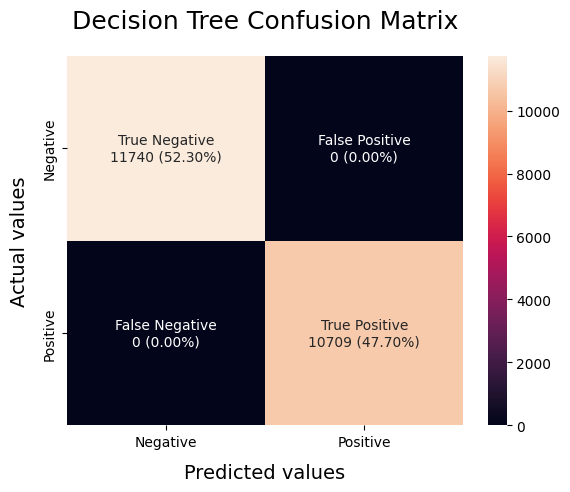

In [ ]:
makeCM_Matrix(confusion_matrix(y_test, dtPreds), 'Decision Tree')

In [ ]:
#Deep learning
import tensorflow
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense,Dropout
# import kerastuner as kt
from keras.callbacks import ModelCheckpoint, EarlyStopping

In [ ]:
X.shape

(44898, 101)

In [ ]:
X

,according,administration,also,america,american,attack,back,bill,called,campaign,...,washington,way,week,well,white,woman,world,would,year,subject
0,0.000000,0.095651,0.097576,0.000000,0.000000,0.000000,0.042699,0.158178,0.043489,0.042602,...,0.079631,0.042371,0.000000,0.044512,0.041789,0.000000,0.000000,0.086972,0.094807,6
1,0.000000,0.506072,0.000000,0.000000,0.041233,0.000000,0.045182,0.000000,0.046018,0.000000,...,0.126393,0.044836,0.085444,0.000000,0.000000,0.000000,0.000000,0.184060,0.000000,6
2,0.000000,0.114218,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.305229,...,0.095088,0.101192,0.096422,0.053152,0.049900,0.000000,0.000000,0.034618,0.037737,6
3,0.072634,0.000000,0.053636,0.000000,0.064257,0.000000,0.000000,0.000000,0.000000,0.351263,...,0.065657,0.000000,0.000000,0.000000,0.206733,0.000000,0.000000,0.047807,0.052114,6
4,0.267301,0.000000,0.078954,0.000000,0.047295,0.000000,0.000000,0.000000,0.052784,0.000000,...,0.144976,0.000000,0.000000,0.000000,0.050720,0.000000,0.057858,0.035187,0.230142,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44893,0.203812,0.221301,0.000000,0.000000,0.090153,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.092118,0.098031,0.093410,0.514921,0.000000,0.000000,0.220578,0.201220,0.000000,1
44894,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.221309,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1
44895,0.045772,0.049700,0.169001,0.048366,0.020247,0.130531,0.110930,0.000000,0.045193,0.000000,...,0.393072,0.110080,0.104891,0.069385,0.000000,0.080669,0.099076,0.210888,0.114944,1
44896,0.000000,0.000000,0.000000,0.449644,0.075291,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.081870,0.000000,0.000000,0.000000,0.000000,0.000000,0.112032,0.061062,1


In [ ]:
model = Sequential()
model.add(Dense(2500,activation='relu',input_dim=101))
model.add(Dense(1500,activation='relu'))
model.add(Dense(1000,activation='relu'))
model.add(Dense(250,activation='relu'))
model.add(Dense(50,activation='relu'))
model.add(Dense(1,activation='sigmoid'))

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 2500)              255000    
                                                                 
 dense_1 (Dense)             (None, 1500)              3751500   
                                                                 
 dense_2 (Dense)             (None, 1000)              1501000   
                                                                 
 dense_3 (Dense)             (None, 250)               250250    
                                                                 
 dense_4 (Dense)             (None, 50)                12550     
                                                                 
 dense_5 (Dense)             (None, 1)                 51        
                                                                 
Total params: 5770351 (22.01 MB)
Trainable params: 57703

In [ ]:
model.compile(loss='binary_crossentropy',optimizer='Adam',metrics=['accuracy'])
history = model.fit(X_train,y_train,epochs=100)

Epoch 1/100
702/702 [==============================] - 58s 80ms/step - loss: 0.0559 - accuracy: 0.9780
Epoch 2/100
702/702 [==============================] - 54s 78ms/step - loss: 0.0182 - accuracy: 0.9939
Epoch 3/100
702/702 [==============================] - 55s 78ms/step - loss: 0.0132 - accuracy: 0.9960
Epoch 4/100
702/702 [==============================] - 53s 76ms/step - loss: 0.0087 - accuracy: 0.9976
Epoch 5/100
702/702 [==============================] - 53s 75ms/step - loss: 0.0154 - accuracy: 0.9959
Epoch 6/100
702/702 [==============================] - 56s 80ms/step - loss: 0.0086 - accuracy: 0.9977
Epoch 7/100
702/702 [==============================] - 55s 79ms/step - loss: 0.0129 - accuracy: 0.9964
Epoch 8/100
702/702 [==============================] - 56s 80ms/step - loss: 0.0080 - accuracy: 0.9978
Epoch 9/100
702/702 [==============================] - 57s 82ms/step - loss: 0.0035 - accuracy: 0.9990
Epoch 10/100
702/702 [==============================] - 54s 77ms/step - l

In [ ]:
y_rec = model.predict(X_test)

702/702 [==============================] - 24s 33ms/step


In [ ]:
y_pred2 = np.where(y_rec>=0.5,1,0)

In [ ]:
accuracy_score(y_test,y_pred2)

0.9991536371330572

In [ ]:
import sklearn.metrics as metrics
cm = metrics.confusion_matrix(y_test, y_pred2)
print(classification_report(y_test, y_pred2))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     11740
           1       1.00      1.00      1.00     10709

    accuracy                           1.00     22449
   macro avg       1.00      1.00      1.00     22449
weighted avg       1.00      1.00      1.00     22449



Text(50.722222222222214, 0.5, 'True')

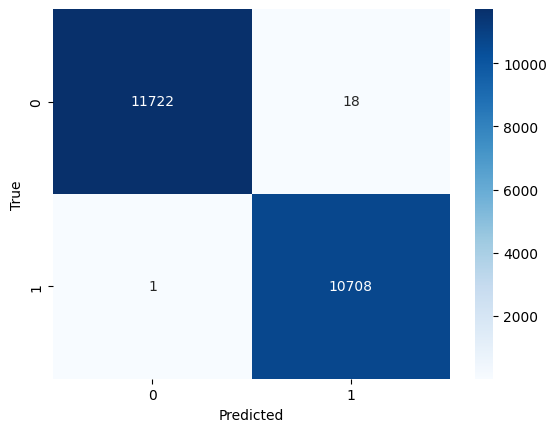

In [ ]:
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')